In [66]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dtype = {'file': str,
         'block': str,
         'tokens': str,
         'subject': str,
         'duration': int,
         'nSFD': float,
         'nFFD': float,
         'nGD': float,
         'nTT': float,
         'PrF': float,
         'Pr1': float,
         'Pr2': float,
         'PrS': float,
         'length': int,
         'wpm': float}

df = pd.read_csv("eight_metrics_block_level.csv", dtype=dtype)

In [19]:
df = df[(df['subject'] == '001') | (df['subject'] == '314')]

In [20]:
df.head()

,file,block,tokens,subject,duration,nSFD,nFFD,nGD,nTT,PrF,Pr1,Pr2,PrS,length,wpm
0,11,4,NaN,001,10447,NaN,57.366304,58.540217,115.437319,0.821429,0.250000,0.571429,0.178571,28,160.811716
1,11,2,NaN,001,11356,NaN,60.747985,61.331319,126.949679,0.812500,0.156250,0.656250,0.187500,32,169.073617
2,11,3,NaN,001,17383,NaN,80.019118,80.577941,161.241503,0.944444,0.166667,0.777778,0.055556,36,124.259334
3,11,5,NaN,001,7128,NaN,43.751948,48.321212,76.085660,0.733333,0.300000,0.433333,0.266667,30,252.525253
4,11,6,NaN,001,6742,NaN,53.124901,53.124901,71.359127,0.685714,0.400000,0.285714,0.314286,35,311.480273


In [38]:
data = df[['nFFD', 'nGD', 'nTT', 'PrF', 'Pr1', 'Pr2', 'PrS', 'wpm']]
target = df['subject']

### Drop High Correlated Features

In [39]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [40]:
data = data.drop(data[to_drop], axis=1)

### Scale Data Using StandardScaler

In [41]:
data = pd.DataFrame(data=StandardScaler().fit_transform(data), columns=data.columns, index=data.index)

In [43]:
data.head()

,nFFD,nTT,PrF,Pr1,Pr2,wpm
0,-0.049957,0.096508,0.351867,-0.277576,0.443190,-0.576095
1,0.110626,0.386529,0.285515,-0.963930,0.884085,-0.479042
2,1.025737,1.250412,1.266053,-0.887669,1.515777,-1.005481
3,-0.696449,-0.894843,-0.302808,0.088479,-0.274618,0.501275
4,-0.251364,-1.013915,-0.656686,0.820590,-1.041930,1.193828


### Train Test Split

In [46]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

In [49]:
print("train data:", train_data.shape)
print("train data:", test_data.shape)
print('train target:', train_target.shape)
print('test target:', test_target.shape)

train data: (179, 6)
train data: (45, 6)
train target: (179,)
test target: (45,)


### Use Random Forest to Train the Data

In [50]:
clf = RandomForestClassifier()

clf.fit(train_data, train_target)

RandomForestClassifier()

### Cross Validation

In [53]:
# Accuracy
statistics.mean(cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy"))

0.6140522875816994

In [55]:
test_predict = cross_val_predict(clf, test_data, test_target, cv=10)

In [62]:
precision_score(test_target, test_predict, pos_label='001')

0.45454545454545453

In [64]:
recall_score(test_target, test_predict, pos_label='001')

0.47619047619047616

In [65]:
f1_score(test_target, test_predict, pos_label='001')

0.46511627906976744

In [67]:
confusion_matrix(test_target, test_predict)

array([[10, 11],
       [12, 12]])

### Other Classifiers

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import plot_confusion_matrix

from tqdm import tqdm

In [78]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

In [80]:
accuracy, precision, recall, f1, confusion = [], [], [], [], []

for name, clf in tqdm(zip(names, classifiers)):
    train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)
    clf.fit(train_data, train_target)
    
    accuracy.append(statistics.mean(cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy")))
    
    test_predict = cross_val_predict(clf, test_data, test_target, cv=10)
    precision.append(precision_score(test_target, test_predict, pos_label='001'))
    recall.append(recall_score(test_target, test_predict, pos_label='001'))
    f1.append(f1_score(test_target, test_predict, pos_label='001'))
    
    confusion.append(confusion_matrix(test_target, test_predict))

1it [00:00,  9.08it/s]/Users/speng/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
9it [00:08,  1.08it/s]


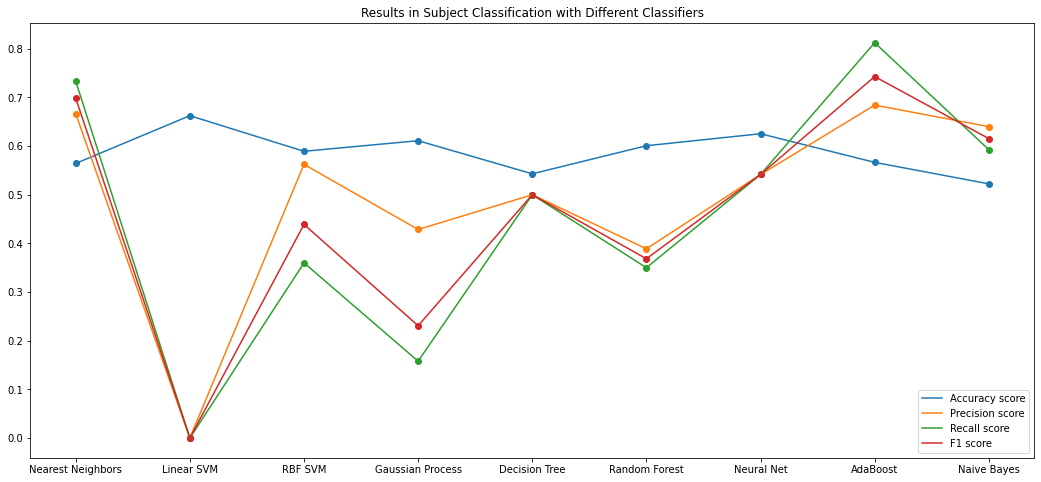

In [96]:
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(names, accuracy, label='Accuracy score')
ax.plot(names, precision, label='Precision score')
ax.plot(names, recall, label='Recall score')
ax.plot(names, f1, label='F1 score')

ax.scatter(names, accuracy)
ax.scatter(names, precision)
ax.scatter(names, recall)
ax.scatter(names, f1)

ax.legend(loc="lower right", frameon=True)

ax.set_title("Results in Subject Classification with Different Classifiers");

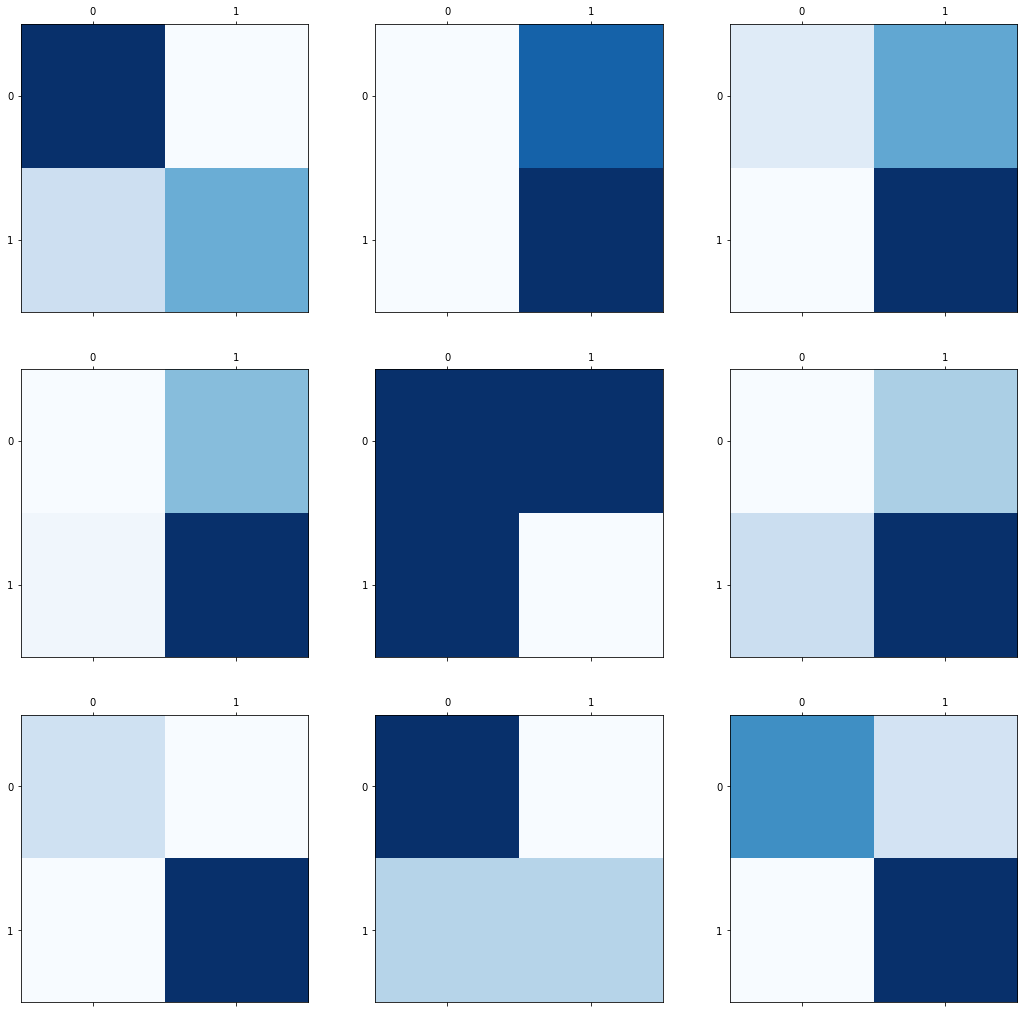

In [97]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(18,18))

axes = axes.flat

for ax, matrix in zip(axes, confusion):
    ax.matshow(matrix, cmap=plt.cm.Blues)

In [ ]:
confusion[-]